In [2]:
using Mamba, BenchmarkTools

# Test 2: Sine

$ f(\theta) = a \sin (b \theta_1 ) - c \theta_2 $

In [2]:
function ff!(x::AbstractVector, jac::AbstractMatrix)
    a = 3 
    b = 6 
    c = 20
    if length(jac) > 0
        jac[:] = c .*[cos(a*x[1])*a/b; -1]';
    end
    
    return c *(sin(a*x[1])/b - x[2])
end

ff! (generic function with 1 method)

### Using RTO

In [3]:
include("../RandomizeThenOptimize.jl")
using RandomizeThenOptimize

In [4]:
p = Problem(2,1)
forward_model!(p,ff!)

ff! (generic function with 1 method)

In [5]:
nsamps = 10000;

In [6]:
chain = rto_mcmc(p,nsamps);
b = @benchmark rto_mcmc(p,nsamps);
tseconds = mean(b).time / 1e9

4.011004276

In [7]:
sim = Chains(nsamps,2,names=[string("θ_",i) for i = 1:2]);
sim[:,:,1] = chain;

In [9]:
ESS = summarystats(sim).value[1,end,1]
ESSpertime = ESS / tseconds

1670.056584589938

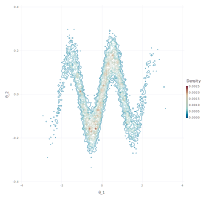

In [57]:
plt = Mamba.plot(sim[:,:,1],:contour,legend=true);
draw(plt,nrow=1,ncol=1)

In [59]:
draw(plt,nrow=1,ncol=1, filename="sine_rto.png")

### Using MALA

In [39]:
nsamps_mala = nsamps*10;
sim_mala = Chains(nsamps_mala,2,names=[string("θ_",i) for i = 1:2]);
θ_mala = MALAVariate([0.0;0.0], 0.01, x->logpostgrad(x,p));

In [40]:
sample!(θ_mala)
b = @benchmark for i in 1:nsamps_mala
    sample!(θ_mala)
    sim_mala[i, :, 1] = θ_mala;
end
tseconds = mean(b).time / 1e9

2.3647589926666663

In [42]:
ESS = summarystats(sim_mala).value[1,end,1]
ESSpertime = ESS / tseconds

451.79286074530273

In [55]:
sim_mala[1001,:,1] = [-4;-0.4];
sim_mala[1101,:,1] = [-4;-0.4];
sim_mala[2001,:,1] = [-4;-0.4];

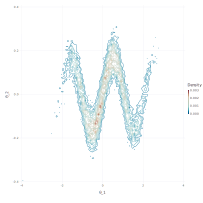

In [60]:
plt = Mamba.plot(sim_mala[1:10:end,:,1],:contour,legend=true);
draw(plt, nrow=1,ncol=1)

In [61]:
draw(plt,nrow=1,ncol=1, filename="sine_mala.png")

### Using HMC

In [14]:
sim_hmc = Chains(nsamps,2,names=[string("θ_",i) for i = 1:2]);
θ_hmc = HMCVariate([0.0;0.0], 0.01, 50, x->logpostgrad(x,p));

In [15]:
sample!(θ_hmc)
b = @benchmark for i in 1:nsamps
    sample!(θ_hmc)
    sim_hmc[i, :, 1] = θ_hmc;
end
tseconds = mean(b).time / 1e9

3.8234474955

In [17]:
ESS = summarystats(sim_hmc).value[1,end,1]
ESSpertime = ESS / tseconds

199.33826549632218

In [53]:
sim_hmc[1001,:,1] = [-4;-0.4];
sim_hmc[1101,:,1] = [-4;-0.4];
sim_hmc[2001,:,1] = [-4;-0.4];
sim_hmc[2101,:,1] = [-4;-0.4];

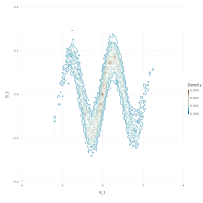

In [62]:
plt = Mamba.plot(sim_hmc[:,:,1],:contour,legend=true);
draw(plt, nrow=1,ncol=1 )

In [63]:
draw(plt,nrow=1,ncol=1, filename="sine_hmc.png")